In [35]:
import sys

sys.path.append('../../DeepCell/')

In [36]:
from imgaug import augmenters as iaa
from PIL import Image
from torchvision import transforms

from SlcDataset import SlcDataset
from eda import display_roi
from Transform import Transform

In [37]:
project_name = 'ophys-experts-slc-oct-2020'
manifest_path = 's3://prod.slapp.alleninstitute.org/behavior_slc_oct_2020/20201020135214/expert_output/ophys-experts-slc-oct-2020/manifests/output/output.manifest'

In [38]:
def display_before_transform(roi_id):
    all_transform = transforms.Compose([
        iaa.Sequential([
            iaa.CenterCropToFixedSize(height=40, width=40),
        ]).augment_image
    ])
    transform = Transform(all_transform=all_transform)
    data = SlcDataset(manifest_path=manifest_path, project_name=project_name, transform=transform)
    display_roi(data=data, roi_id=roi_id, columns=3, rows=1, label='Cell')

In [43]:
all_transform = transforms.Compose([
    iaa.Sequential([
        iaa.Sometimes(0.5, iaa.Affine(scale=(0.7, 1.3), rotate=(-360, 360), order=0)),
        iaa.Sometimes(0.5, iaa.GammaContrast((0.5, 1.5))),
        iaa.Sometimes(0.5, iaa.Multiply((0.5, 1.5))),
        iaa.Fliplr(0.5),
        iaa.Flipud(0.5),
        iaa.CenterCropToFixedSize(height=40, width=40),
        iaa.OneOf([
            iaa.Sometimes(0.3, iaa.Dropout(p=(0, 0.01))),
            iaa.Sometimes(0.3, iaa.imgcorruptlike.ElasticTransform(severity=1))  
        ])
    ]).augment_image
])

transform = Transform(all_transform=all_transform)
data = SlcDataset(manifest_path=manifest_path, project_name=project_name, transform=transform)

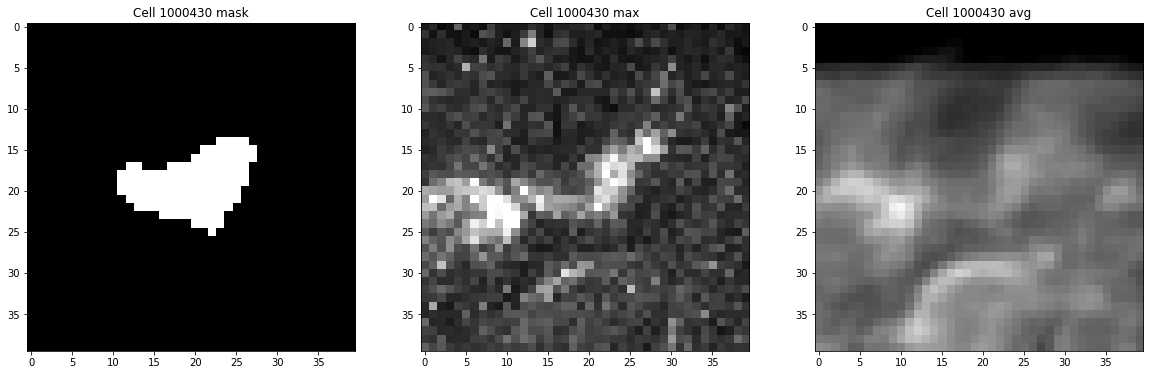

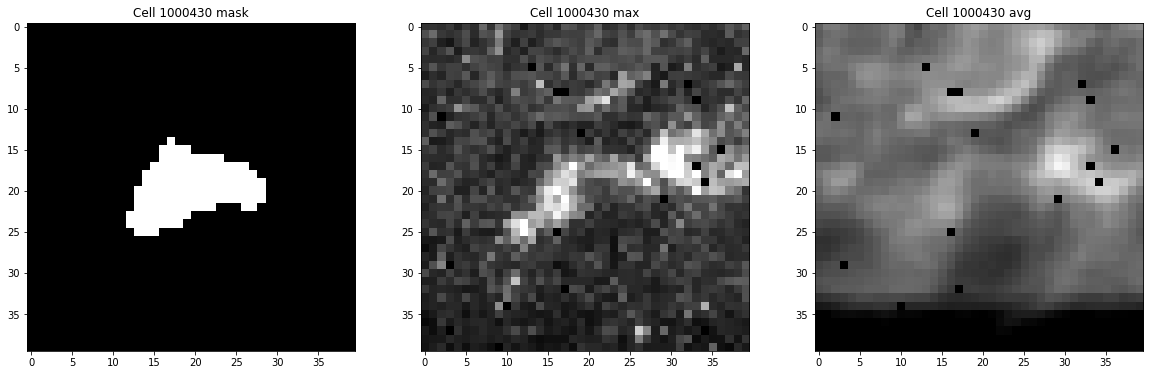

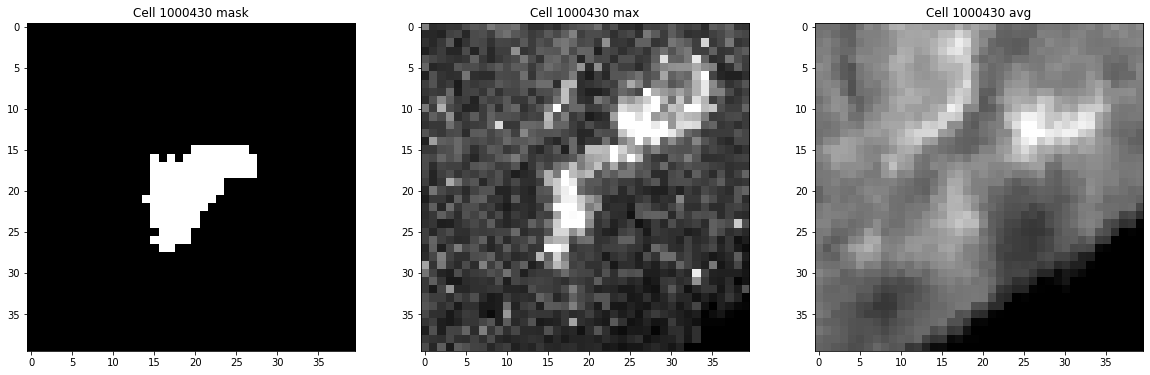

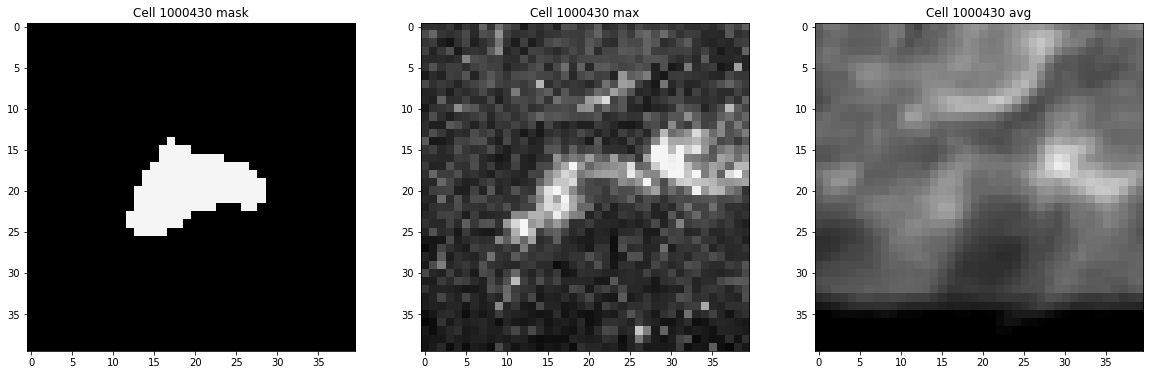

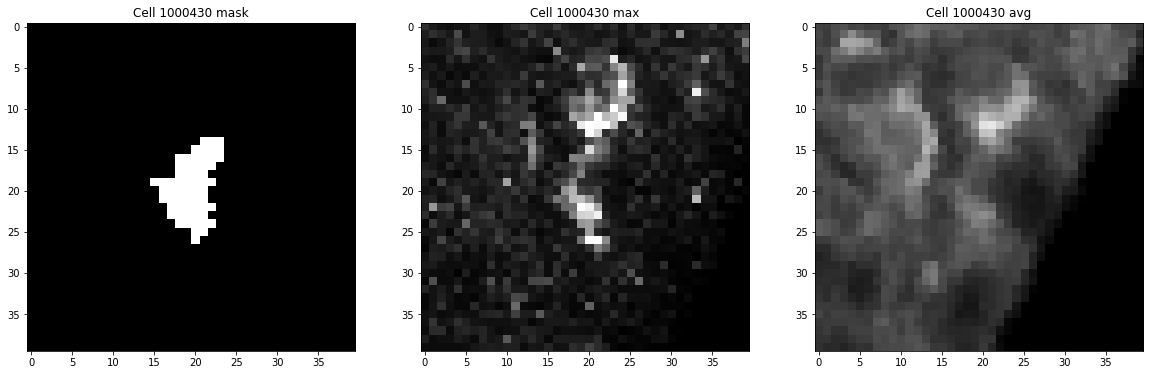

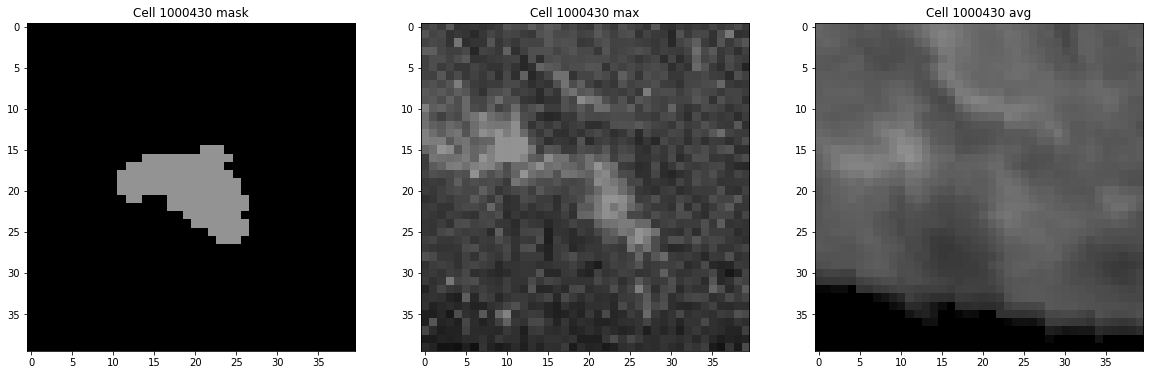

In [44]:
display_before_transform(roi_id=1000430)

for _ in range(5):
    display_roi(data=data, roi_id=1000430, columns=3, rows=1, label='Cell')

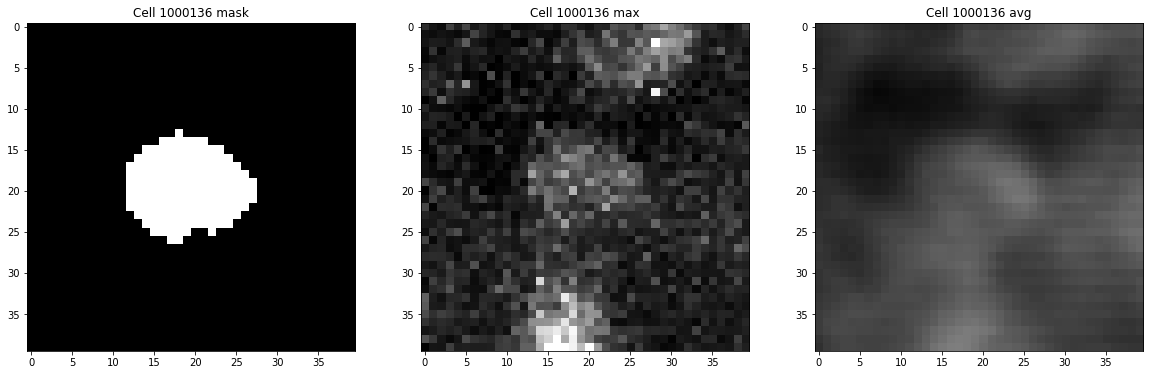

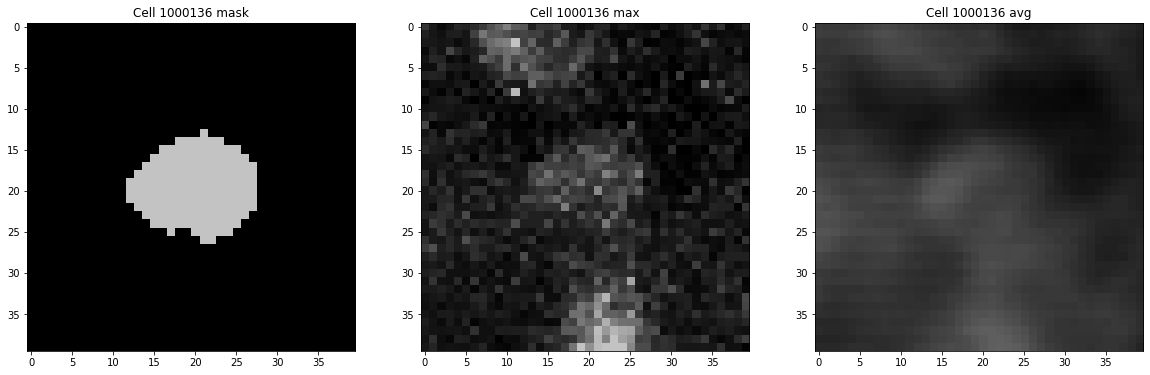

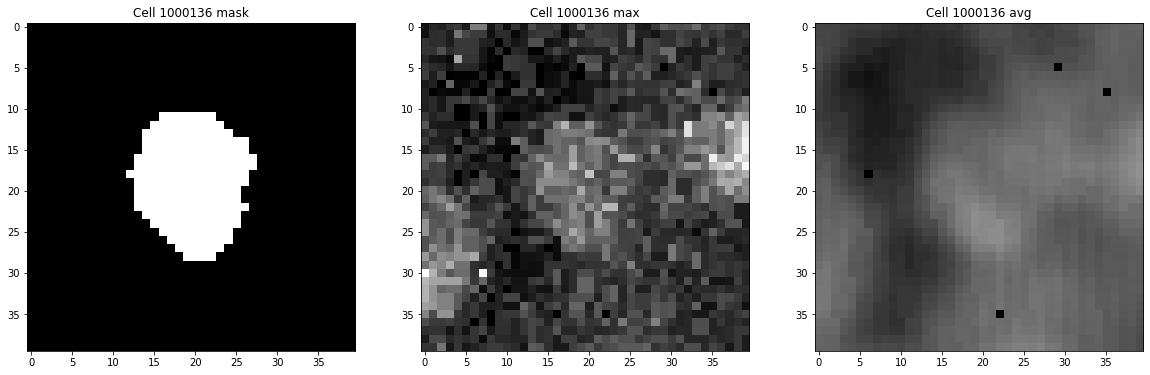

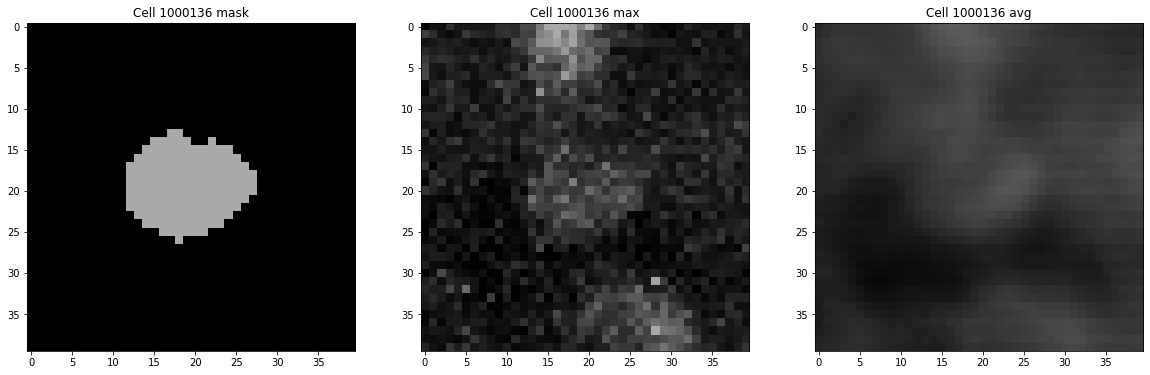

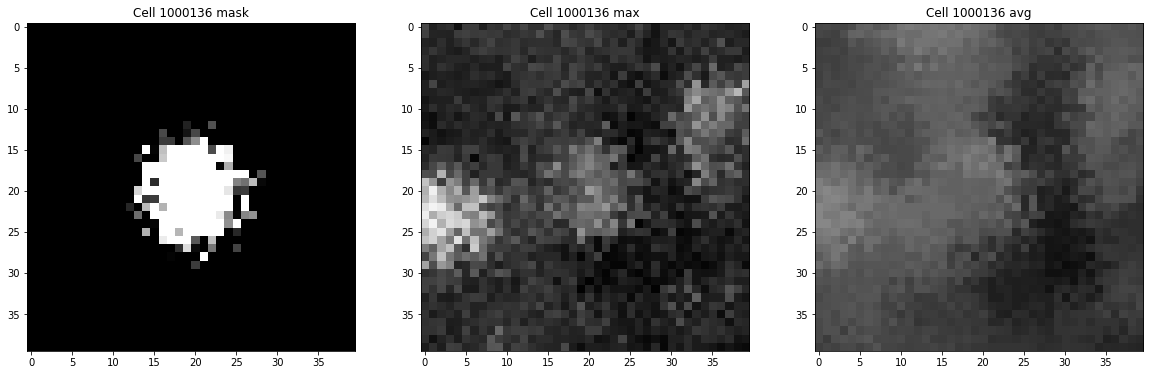

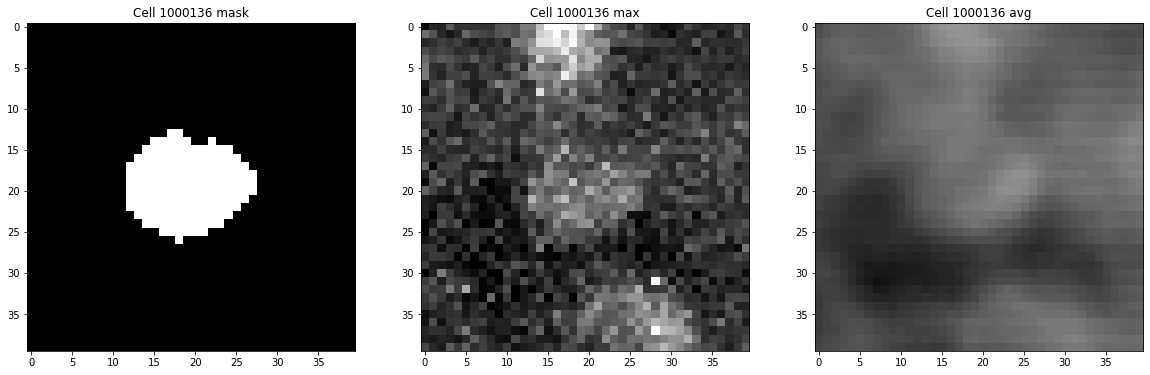

In [45]:
display_before_transform(roi_id=1000136)

for _ in range(5):
    display_roi(data=data, roi_id=1000136, columns=3, rows=1, label='Cell')

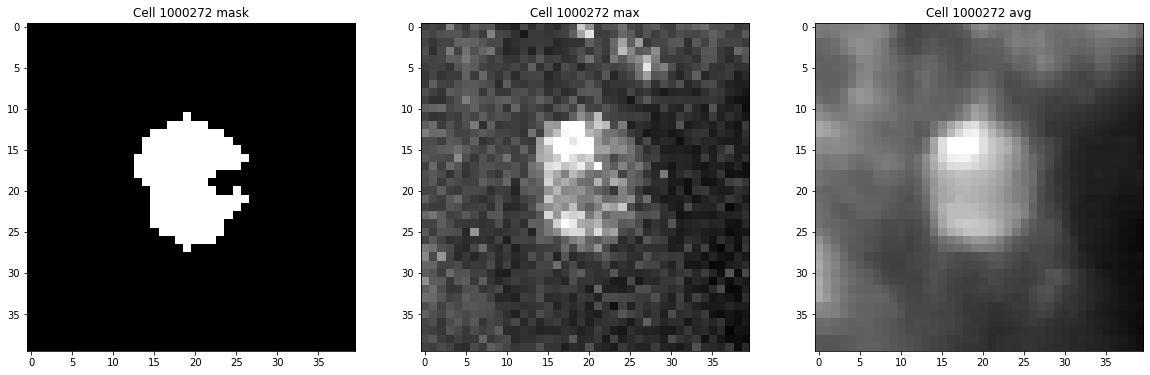

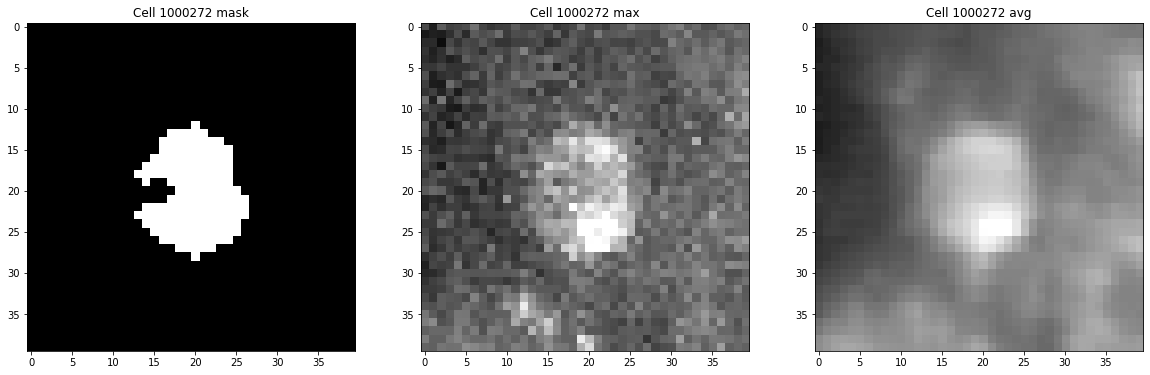

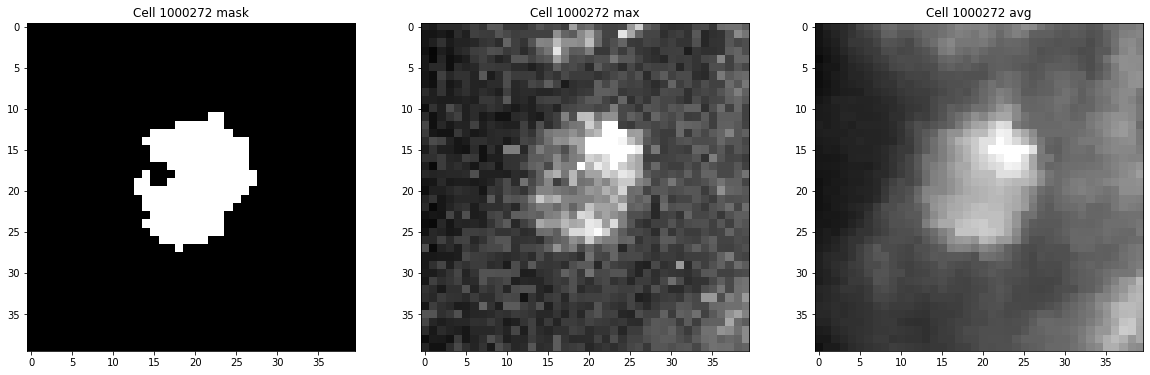

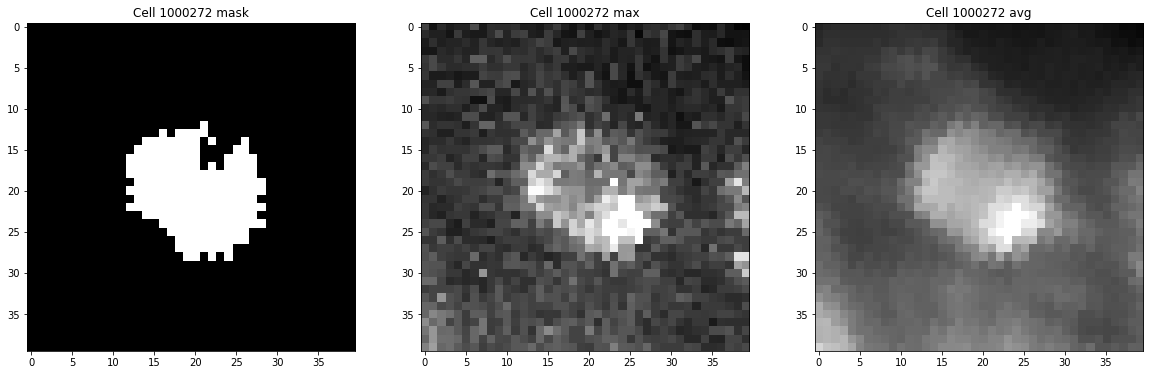

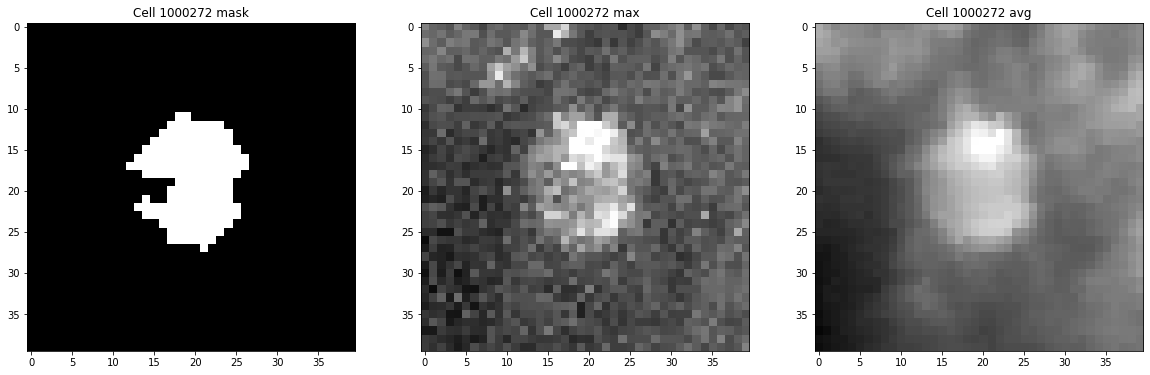

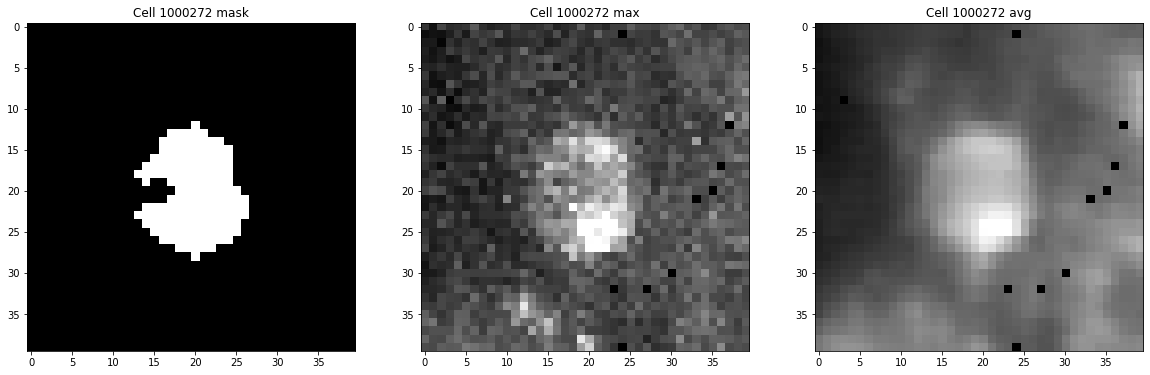

In [46]:
display_before_transform(roi_id=1000272)

for _ in range(5):
    display_roi(data=data, roi_id=1000272, columns=3, rows=1, label='Cell')